# **Задание к дипломной работе по курсу "Python для анализа данных"**

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharingПризнаки:1.satisfaction_level​

Признаки:

1.**satisfaction_level​** - Уровень удовлетворенности работой

2.**Last_evaluation** ​- Время с момента последней оценки в годах

3.**number_projects​** - Количество проектов, выполненных за время работы

4.**average_monthly_hours​** - Среднее количество часов на рабочем месте в месяц

5.**time_spend_company​**- Стаж работы в компании в годах

6.**work_accident**​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.**left​** - уволился ли сотрудник

8.**promotion_last_5years​** - повышался ли сотрудник за последние пять лет

9.**department** ​- отдел в котором работает сотрник

10.**salary​** - относительный уровень зарплаты

1. Загрузим файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
HR_df=pd.read_csv('/content/HR.csv')
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитаем основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
HR_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3. Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.Определим две самые скоррелированные и две наименее скоррелированные переменные.

In [ ]:
# посчитаем коэффициенты корреляции между всеми показателями
HR_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


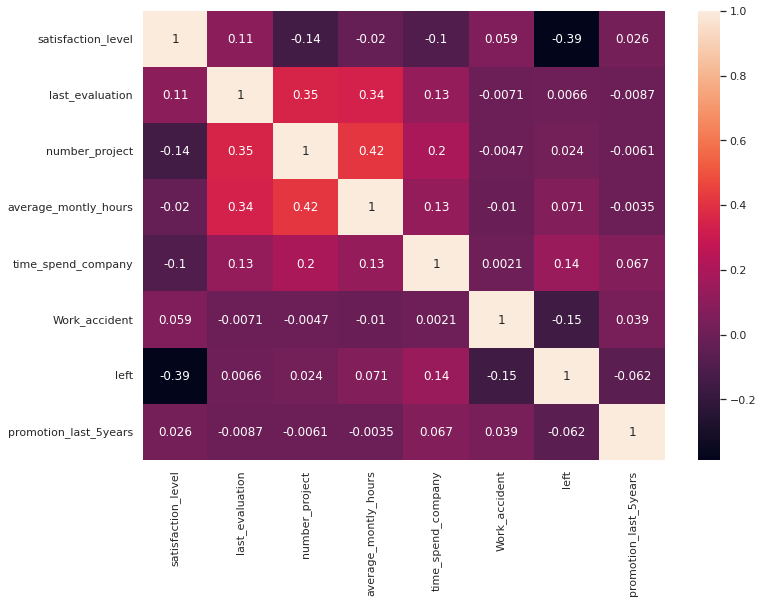

In [ ]:
#визуализируем с помощью тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(HR_df.corr(), annot=True)

Проанализировав тепловую карту, мы можем сделать вывод, что ***наиболее скоррелированные*** переменные это:
* satisfaction_level и left​ (отрицательная корреляция, т.е. при увеличении одного параметра, второй будет уменьшаться и наоборот)
* average_monthly_hours и number_projects (положительная корреляция, т.е. при увеличении одного параметра, второй будет так же увеличиваться)

К ***наименее скоррелированным*** переменным отнесем:
* work_accident​ и time_spend_company​
* promotion_last_5years​ и average_monthly_hours

4. Рассчитаем сколько сотрудников работает в каждом департаменте.

In [ ]:
HR_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5. Покажем распределение сотрудников по зарплатам.

In [ ]:
salary_by_employee = HR_df[['department','salary']].groupby('salary').count()
salary_by_employee

,department
salary,
high,1237
low,7316
medium,6446


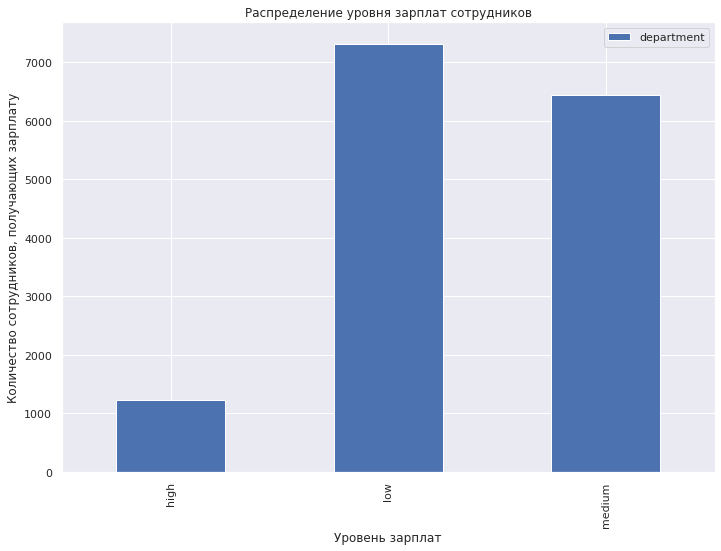

In [ ]:
salary_by_employee.loc[['high', 'low', 'medium']].plot(kind='bar',
                                                      title='Распределение уровня зарплат сотрудников',
                                                      xlabel='Уровень зарплат',
                                                      ylabel='Количество сотрудников, получающих зарплату')

6. Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [ ]:
salary_by_department = HR_df.groupby(['department','salary']).agg({'salary': ['count']}). reset_index()
salary_by_department.columns=(['department','salary','сount'])
salary_by_department['department_salary']=salary_by_department['department']+ ' '+ salary_by_department['salary']
salary_by_department=salary_by_department.sort_values('сount', ascending=False)

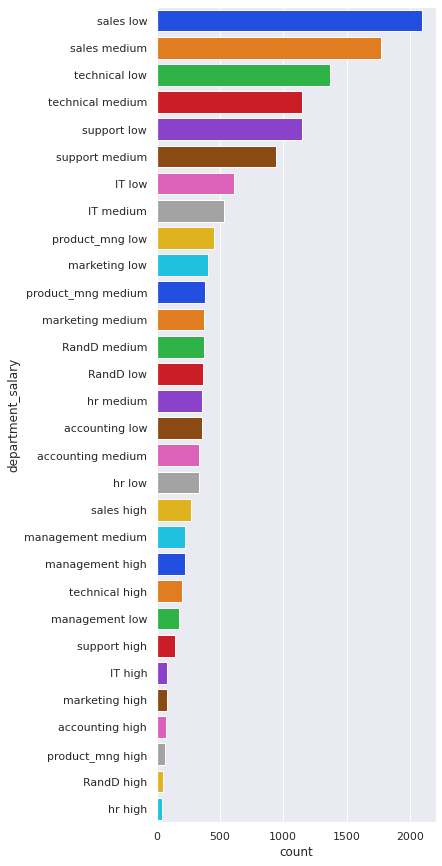

In [ ]:
plt.figure(figsize=(5,15))
sns.barplot(x='сount', y='department_salary', palette='bright', data=salary_by_department);

7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [ ]:
monthly_hours =HR_df[['salary','average_montly_hours']]
monthly_hours_for_high_salary=monthly_hours.loc[monthly_hours['salary']=='high']
monthly_hours_for_low_salary=monthly_hours.loc[monthly_hours['salary']=='low']

#Рассчитаем, используя тест Манна-Уитни, схожи или различаются выборки данных.Уровень значимости примем α=0.05
#H0-распределения не отличаются,т.е. сотрудники проводят одинаковое время на работе.
#H1-распределения отличаются,т.е. сотрудники проводят разное время на работе.

stat, p = st.mannwhitneyu(monthly_hours_for_high_salary['average_montly_hours'], monthly_hours_for_low_salary['average_montly_hours'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые.Сотрудники проводят одинаковое время на работе')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются.Сотрудники проводят разное время на работе')

Статистика=4507096.500, p=0.824
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые.Сотрудники проводят одинаковое время на работе


8. Рассчитаем следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [ ]:
df_stat=HR_df[['satisfaction_level','promotion_last_5years','number_project','left']]

left_employee=df_stat.loc[df_stat['left']== 1]# уволенные сотрудники
working_employee=df_stat.loc[df_stat['left']== 0]# работающие сотрудники

In [ ]:
#Рассчитаем показатели для уволенных сотрудников.
promoted=(left_employee.loc[left_employee['promotion_last_5years']== 1].count())/(left_employee['promotion_last_5years'].count())
print(f"Доля сотрудников с повышением за последние 5 лет: {promoted['promotion_last_5years']*100:.2f} %")

satisfied=left_employee['satisfaction_level'].mean()
print(f"Средняя степень удовлетворенности: {satisfied*100:.2f} %")

projects=left_employee['number_project'].mean()
print(f"Среднее количество проектов: {round(projects)}")

Доля сотрудников с повышением за последние 5 лет: 0.53 %
Средняя степень удовлетворенности: 44.01 %
Среднее количество проектов: 4


In [ ]:
#Рассчитаем показатели для работающих сотрудников.
promoted=(working_employee.loc[working_employee['promotion_last_5years']== 1].count())/(working_employee['promotion_last_5years'].count())
print(f"Доля сотрудников с повышением за последние 5 лет: {promoted['promotion_last_5years']*100:.2f} %")

satisfied=working_employee['satisfaction_level'].mean()
print(f"Средняя степень удовлетворенности: {satisfied*100:.2f} %")

projects=working_employee['number_project'].mean()
print(f"Среднее количество проектов: {round(projects)}")

Доля сотрудников с повышением за последние 5 лет: 2.63 %
Средняя степень удовлетворенности: 66.68 %
Среднее количество проектов: 4


9. Разделим данные на тестовую и обучающую выборки. Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

  Оценить качество модели на тестовой выборки.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
x=HR_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours',
               'time_spend_company','Work_accident','promotion_last_5years']] # факторы
y=HR_df['left'] # целевая переменная

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
# обучим данные
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
# делаем прогноз
y_pred = LDA.predict(x_test)
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#посмотрим коэф. детерминации, насколько качественна наша модель
LDA.score(x_test, y_test)

0.7557777777777778

Видим, что значение коэффициента детерминации 0,75. Т.е. качесиво модели достаточно хорошее.